## Import the necessary libraries

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sb

from datetime import date
import math

---

## Crawling data from web
The dataset used for analysising is collected from [Worldometer](https://www.worldometers.info/coronavirus/)

- Get chrome driver to browse in `Chrome`

In [2]:
browser = webdriver.Chrome(executable_path="./../chromedriver_win32/chromedriver.exe")
# browser = webdriver.Chrome()

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1545785294.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(executable_path="./../chromedriver_win32/chromedriver.exe")


In [3]:
browser.get("https://www.worldometers.info/coronavirus/")
browser.implicitly_wait(20)
browser.minimize_window()

html_text = BeautifulSoup(browser.page_source, "html.parser")
browser.quit()# Close the Chrome browser

In [4]:
def get_string(row):
    row.pop(0)# remove id value
    if len(row) == 17:
        row.pop(-3)# remove redundant empty value
    if len(row) == 16:
        row.pop(1)# remove duplicated country name
    for i in range(len(row)):
        row[i] = row[i].string# pure get data
        if row[i] in [' ']: row[i] = np.nan
        try:
            row[i] = int(row[i].replace(',',''))# astype numeric values
        except: pass
        
    return row

In [5]:
rows = html_text.select("tr:not([style='display: none'])")[:233]# get 233 rows of the table
columns = re.findall('>([\w\d,/ ]*)<',str(rows[0]))# get columns name from html
columns = str(columns[2:-1])[2:-2].replace("', '', '",'|').replace("', '",' ').split('|')# get columns name from list 
print(columns, len(columns))

#get data of each table's cell, except 2 first rows
rows = list(map(lambda line: line.find_all(['td','a']), rows[2:]))
rows = list(map(lambda line: get_string(line), rows))

['Country, Other', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical', '1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population', 'Continent'] 15


In [38]:
df = pd.DataFrame(rows, columns=columns)
# df

## Pre-processing

- Missing ratio of attributes

In [39]:
df.apply(lambda c: c.isna().mean())

Country, Other       0.000000
Total Cases          0.000000
New Cases            0.900433
Total Deaths         0.025974
New Deaths           0.935065
Total Recovered      0.008658
New Recovered        0.779221
Active Cases         0.000000
Serious, Critical    0.402597
1M pop               0.008658
Deaths/ 1M pop       0.034632
Total Tests          0.077922
Tests/ 1M pop        0.077922
Population           0.008658
Continent            0.008658
dtype: float64

`Comment:` Because the covid situation is no longer serious, the attributes consist of 'New Cases', 'New Deaths', 'New Recovered' are not updated regularly (have high missing ratio). They wil be removed. 

In [40]:
df.drop(['New Cases','New Deaths','New Recovered'], axis=1, inplace=True)
df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105649010,1148993.0,103223189,1276828,2346,315554.0,3432.0,1.169116e+09,3491928.0,3.348053e+08,North America
1,India,44691338,530784.0,44156651,3903,N/A,31772.0,377.0,9.197168e+08,653843.0,1.406632e+09,Asia
2,France,39657165,165213.0,39430751,61201,869,604673.0,2519.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38266753,169222.0,37889500,208031,N/A,456189.0,2017.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37085520,699310.0,36249161,137049,N/A,172208.0,3247.0,6.377617e+07,296146.0,2.153536e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699,0,None,NaN,NaN,NaN,NaN,NaN,None
227,Vatican City,29,NaN,29,0,None,36295.0,NaN,NaN,NaN,7.990000e+02,Europe
228,Western Sahara,10,1.0,9,0,None,16.0,2.0,NaN,NaN,6.261610e+05,Africa
229,MS Zaandam,9,2.0,7,0,None,NaN,NaN,NaN,NaN,NaN,None


In [41]:
df.to_csv("2023-02-16.csv")
# df.to_csv(f"{date.today()}.csv")

---

## Read data from CSV file

In [42]:
df = pd.read_csv("2023-02-16.csv")
# df = pd.read_csv(f"{date.today()}.csv")
df = df.drop(df.columns[0], axis=1)
# df = df.astype({df.columns[i]:'Int64' for i in range(1,len(columns)-1)})
df

,"Country, Other",Total Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical",1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,Continent
0,USA,105649010,1148993.0,103223189.0,1276828.0,2346.0,315554.0,3432.0,1.169116e+09,3491928.0,3.348053e+08,North America
1,India,44691338,530784.0,44156651.0,3903.0,NaN,31772.0,377.0,9.197168e+08,653843.0,1.406632e+09,Asia
2,France,39657165,165213.0,39430751.0,61201.0,869.0,604673.0,2519.0,2.714902e+08,4139547.0,6.558452e+07,Europe
3,Germany,38266753,169222.0,37889500.0,208031.0,NaN,456189.0,2017.0,1.223324e+08,1458359.0,8.388360e+07,Europe
4,Brazil,37085520,699310.0,36249161.0,137049.0,NaN,172208.0,3247.0,6.377617e+07,296146.0,2.153536e+08,South America
...,...,...,...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Vatican City,29,NaN,29.0,0.0,NaN,36295.0,NaN,NaN,NaN,7.990000e+02,Europe
228,Western Sahara,10,1.0,9.0,0.0,NaN,16.0,2.0,NaN,NaN,6.261610e+05,Africa
229,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---

## Visualization
### Overview

In [43]:
def correlation_2_attr(attr1, attr2):
    # plt.figure(figsize=(15.5,15.5))
    x_values = df[f'{attr1}'].apply(lambda x: math.log10(x))
    y_values = df[f'{attr2}'].apply(lambda x: math.log10(x))
    plt.scatter(x_values, y_values)
    plt.title(f'{attr1} and {attr2} Correlation (log scale)')
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    # plt.xticks(np.arange(0,10.1,0.2))
    # plt.yticks(np.arange(0,10.1,0.25))
    # plt.grid()
    plt.plot([0, max(x_values)], [0, max(x_values)], label=f'Where {attr1} equals to {attr2}')
    plt.legend()
    plt.show()

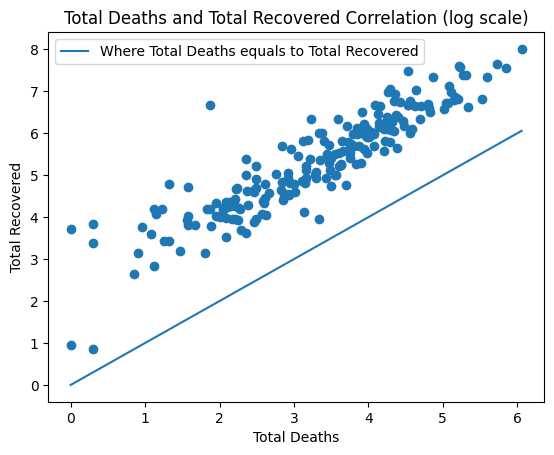

In [44]:
correlation_2_attr('Total Deaths','Total Recovered')

`Comment:` 
- All countries have more recovered cases than death cases.
- Recovered cases and death cases have positive linear correlation.

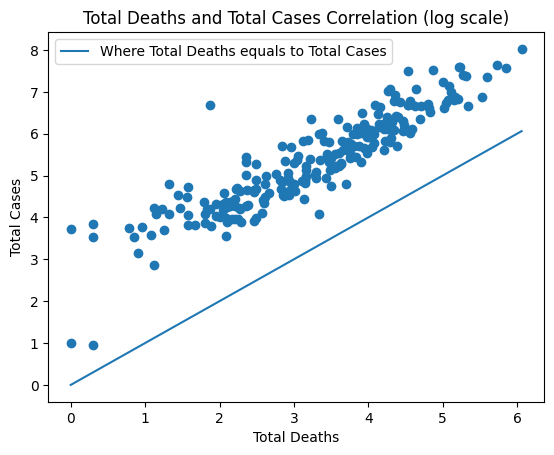

In [45]:
correlation_2_attr('Total Deaths','Total Cases')

`Comment:` no difference with correlation between Recovered cases and Death cases

### Continent Observation

In [52]:
Continent = df.dropna().groupby('Continent').sum()#.astype(int)
Continent = Continent[['Total Cases','Total Deaths','Total Recovered','Active Cases']]
Continent

C:\Users\ACER\AppData\Local\Temp\ipykernel_11300\1110373326.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Continent = df.dropna().groupby('Continent').sum()#.astype(int)


,Total Cases,Total Deaths,Total Recovered,Active Cases
Continent,,,,
Africa,9014794,183395.0,8582205.0,249194.0
Asia,116431145,561721.0,102800185.0,13069239.0
Australia/Oceania,11512240,20443.0,11456116.0,35681.0
Europe,153690629,1099375.0,150962752.0,1628502.0
North America,116200573,1262761.0,113206153.0,1731659.0
South America,30036679,629293.0,29261196.0,146190.0


- Radar chart code is referenced from [website](https://betterdatascience.com/radar-charts-matplotlib-plotly/)

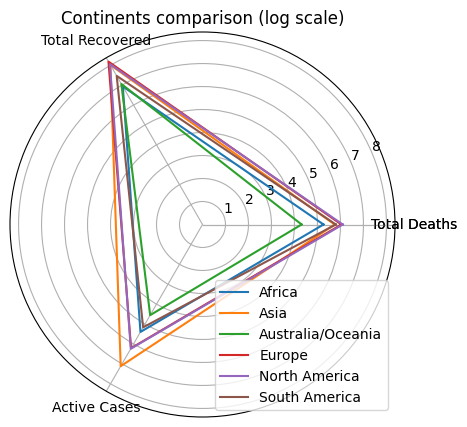

In [47]:
categories = list(Continent.columns[1:4])
categories = [*categories,categories[0]]

label_loc = np.linspace(start=0, stop=2*np.pi, num=4)

plt.figure(figsize=(5, 5))
plt.subplot(polar=True)
for i in range(len(Continent.index)):
    data = list(Continent.iloc[i,1:4].apply(lambda x: math.log10(x)))
    # print([*data,data[0]])
    plt.plot(label_loc, [*data,data[0]], label=Continent.index[i])

plt.title('Continents comparison (log scale)')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

`Comment:` 
- Recovered rate is high in all continents.
- Asia has highest total cases but the number of recovered and deaths is near to America and Europe.
- 

In [53]:
percent_continent = Continent[['Total Recovered','Total Deaths','Active Cases']].div(Continent['Total Cases'], 0)*100
percent_continent

,Total Recovered,Total Deaths,Active Cases
Continent,,,
Africa,95.201343,2.034378,2.764278
Asia,88.292686,0.482449,11.224865
Australia/Oceania,99.512484,0.177576,0.309940
Europe,98.225086,0.715317,1.059597
North America,97.423059,1.086708,1.490233
South America,97.418213,2.095082,0.486705


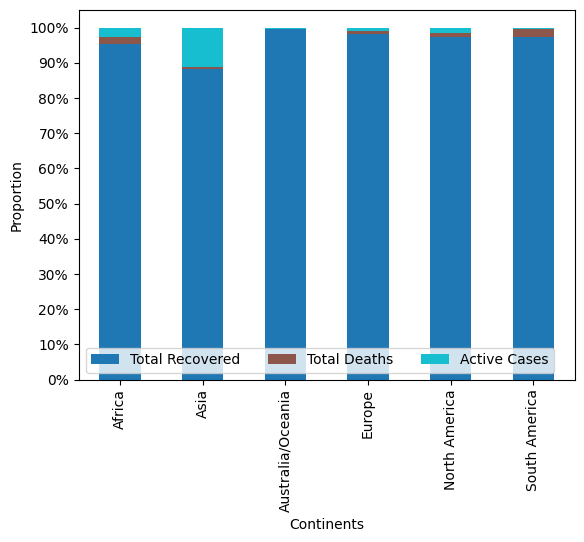

In [49]:
from matplotlib.ticker import FormatStrFormatter

percent_continent.plot(kind='bar', stacked=True, colormap='tab10')

plt.legend(ncol=3)
plt.xlabel("Continents")
plt.ylabel("Proportion")
plt.yticks(range(0,101,10))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d%%'))
plt.show()

`Comment:`
- Asia has the highest active cases.
- Australia/Oceania seems to be dealing with Covid epidemic most effectively.
- Meanwhile, Africa and South America have the highest Deaths ratio.

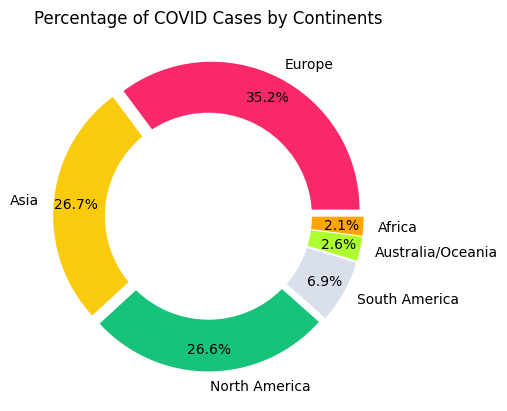

In [54]:
def donut_attri_product(attr):
	data = Continent.sort_values(by=attr, ascending=0)
	colors = ['#F92969','#FACA0C','#17C37B','#D9DFEB','#ADFF2F','#FFA500']
	explode = [0.05]*6

	plt.pie(data[f'{attr}'], colors=colors, labels=data.index,
			autopct='%1.1f%%', pctdistance=0.85, explode=explode)

	# draw circle
	centre_circle = plt.Circle((0, 0), 0.70, fc='white')
	fig = plt.gcf()

	# Adding Circle in Pie chart
	fig.gca().add_artist(centre_circle)

	plt.title(f'Percentage of COVID Cases by Continents')
	plt.show()

donut_attri_product('Total Cases')

`Comment:`
- Europe have highest the total cases.
- Meanwhile, Africa has weak medical, but the number of total cases of Africa is the smalest one.